# Linear Regression with iPython Notebook

In [31]:
import torch
from matplotlib import pyplot as plt

## Create the Data

In [32]:
n_samples = 100
weights, bias = torch.rand(1), 0.3
X = torch.randn(n_samples, 1)
noise = torch.randn(n_samples) * 0.15
Y = X@weights + bias + noise

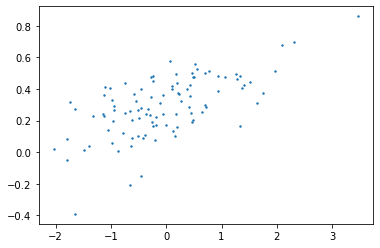

In [33]:
plt.scatter(X, Y, s=2)

## Find a Line which matches these values

In [34]:
pred_weights, pred_bias = torch.ones(1), torch.tensor(0.0)
pred_y = X*pred_weights + pred_bias

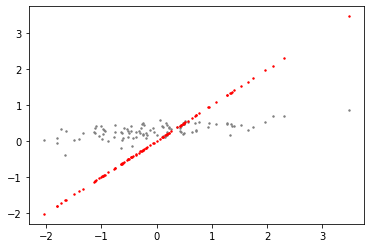

In [35]:
plt.scatter(X, Y, s=2, c="gray")
plt.scatter(X, pred_y, c="red", s=2)

So, our goal is to find a `weights` and `bias` values which minimize the loss.

## Loss

Loss is a single value for the difference between the actual & the prediction. Let's use a something called, mean squared error.

In [36]:
def mse_loss(Y, y_pred):
    return ((Y-y_pred)**2).mean()

mse_loss(Y, pred_y)

tensor(1.1188)

## Gradient Descent

We can use the SGD loop to find it.

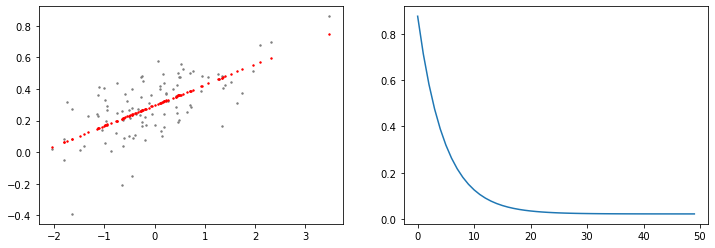

In [37]:
pred_weights.requires_grad_()
pred_bias.requires_grad_()

lr = 0.05

losses = []

for i in range(50):
    if pred_weights.grad is not None:
      pred_weights.grad.zero_()
      pred_bias.grad.zero_()

    pred_y = X@pred_weights + pred_bias
    loss = mse_loss(Y, pred_y)
    loss.backward()

    losses.append(loss.item())

    with torch.no_grad():
      pred_weights -= pred_weights.grad * lr
      pred_bias -= pred_bias.grad * lr

_, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(X, Y, s=2, c="gray")
ax[0].scatter(X, pred_y.detach().cpu(), c="red", s=2)

ax[1].plot(losses)

## Train & Validation Set